## LetsGrowMore (LGMVIP): TASK 1

## Name: Diptesh Milind Chaudhari

#### Problem Statement: From the given "Iris" dataset, predict the optimum number of clusters and represent them visually.

### Import all libraries needed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
plt.style.use('seaborn-darkgrid')

### Loading Dataset in IDE.

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

### Overview of Dataset

In [4]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Handeling null and duplicate values

In [28]:
df.duplicated().sum()

1

In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

0 indicates that there is not any null value in dataset.


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

### Finding Correlation and Heatmap.

In [12]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

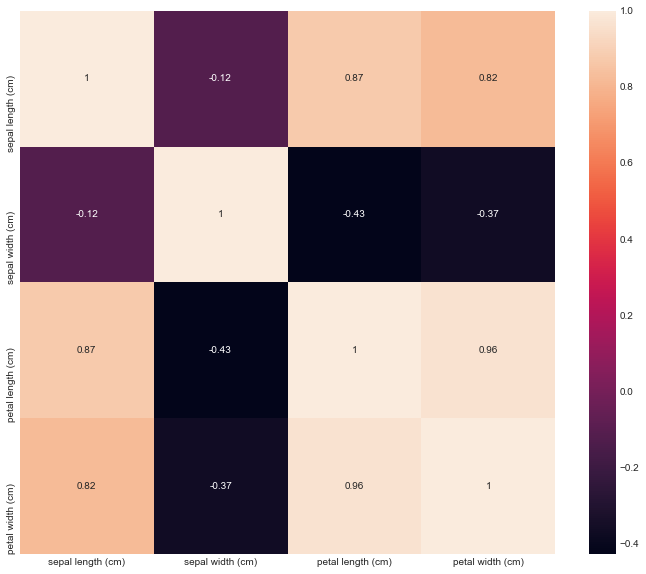

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True)

### Performing exploratory Data Analysis.

#### 1. Histogram

<AxesSubplot:>

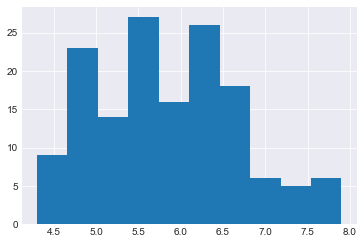

In [14]:
df['sepal length (cm)'].hist()

<AxesSubplot:>

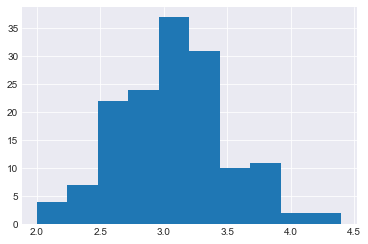

In [15]:
df['sepal width (cm)'].hist()

<AxesSubplot:>

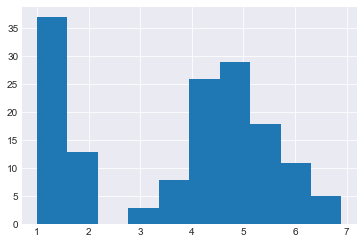

In [16]:
df['petal length (cm)'].hist()

#### 2. Distplot

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

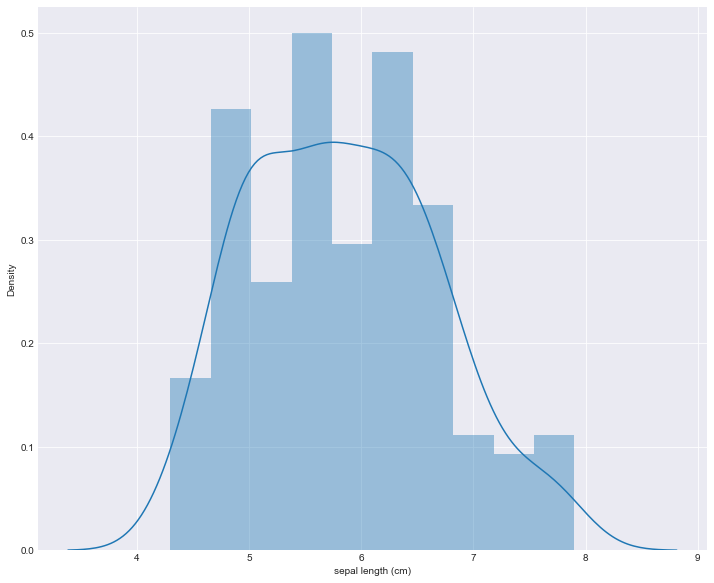

In [17]:
plt.figure(figsize = (12,10))
sns.distplot(df["sepal length (cm)"], bins = 10)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

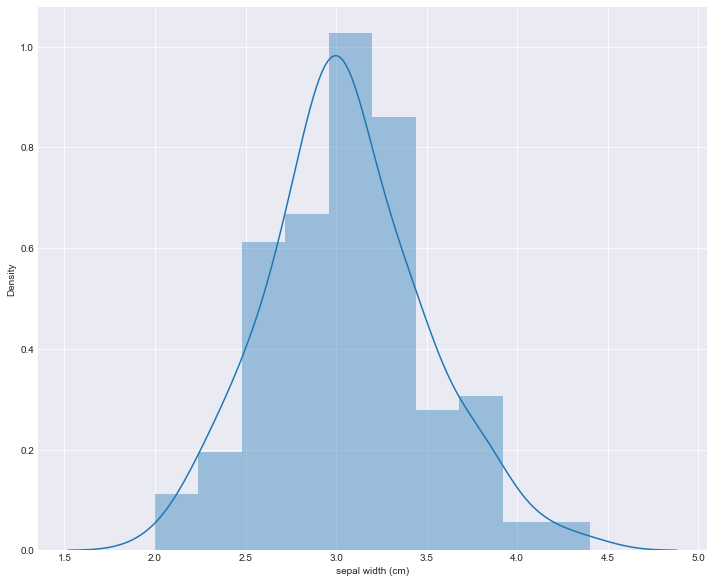

In [18]:
plt.figure(figsize = (12,10))
sns.distplot(df["sepal width (cm)"], bins = 10)

<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

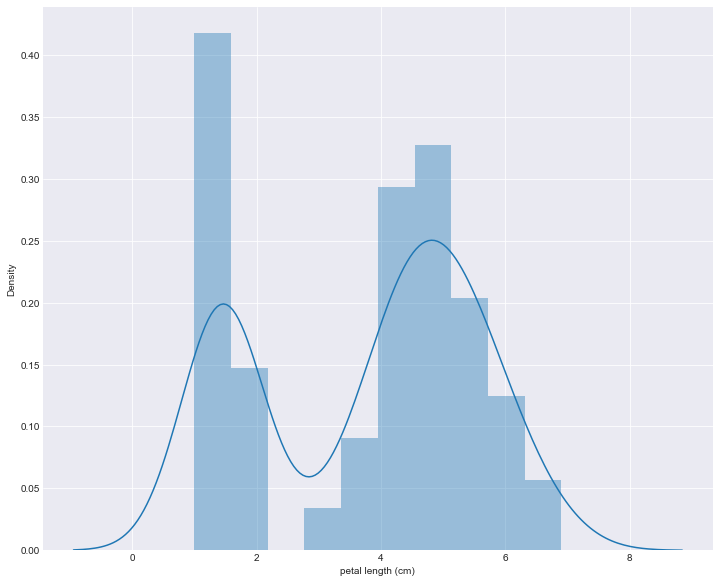

In [19]:
plt.figure(figsize = (12,10))
sns.distplot(df["petal length (cm)"], bins = 10)

#### 3. Joinplot

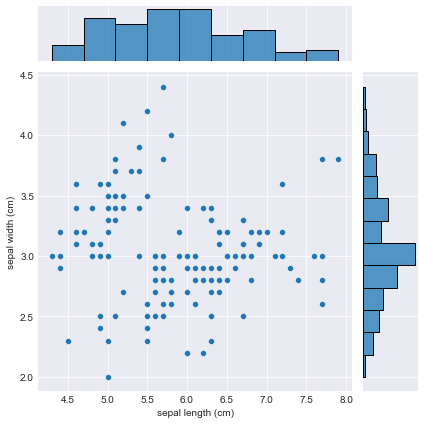

In [20]:
sns.jointplot(x = "sepal length (cm)", y = "sepal width (cm)", data = df)

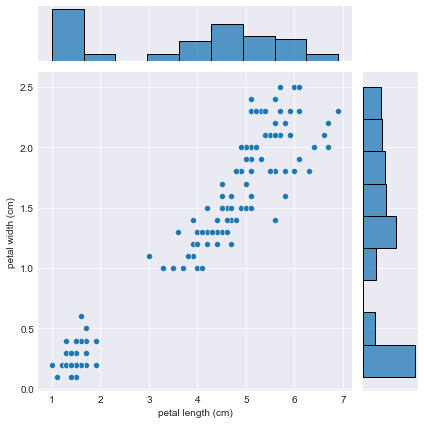

In [21]:
sns.jointplot(x = "petal length (cm)", y = "petal width (cm)", data = df)

#### 4. Boxplot

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

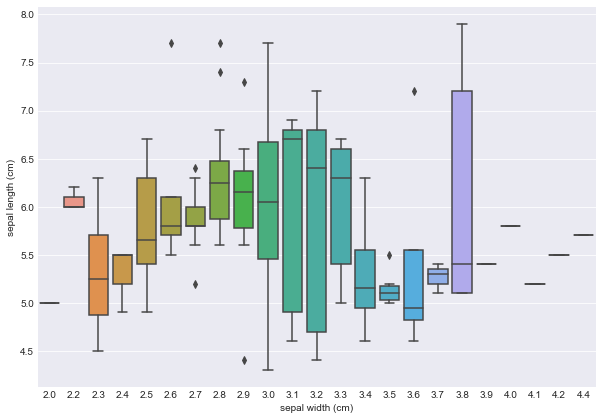

In [22]:
plt.figure(figsize = (10, 7))
sns.boxplot(data = df, x = 'sepal width (cm)', y = 'sepal length (cm)')

### Data Preparation.

#### K-Mean

In [23]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(kmeans)

KMeans(n_clusters=10, random_state=0)


#### Elbow Method.

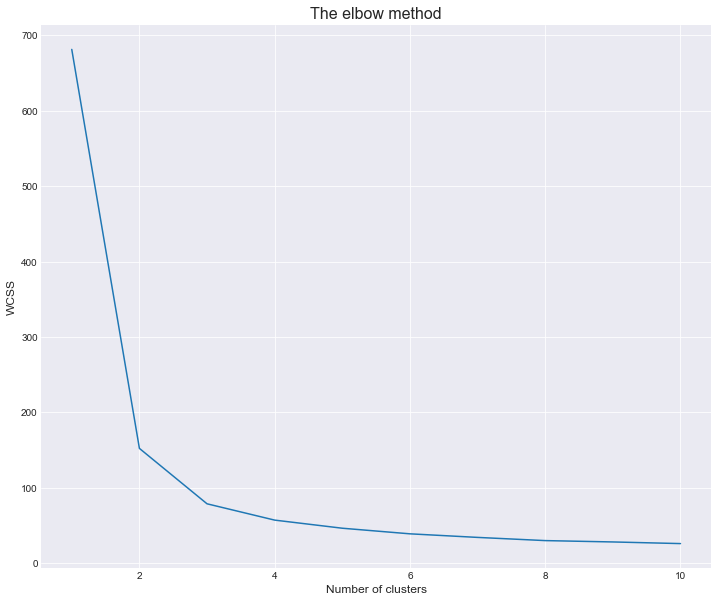

In [24]:
plt.figure(figsize = (12,10))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method' , size = 16)
plt.xlabel('Number of clusters' , size = 12)
plt.ylabel('WCSS' , size = 12)
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### K Means

In [26]:
kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)

[5 4 4 4 5 1 4 5 4 4 1 5 4 4 1 1 1 5 1 5 5 5 4 5 5 4 5 5 5 4 4 5 1 1 4 4 5
 5 4 5 5 4 4 5 5 4 5 4 5 5 8 8 8 6 8 6 8 3 8 6 3 6 6 8 6 8 6 6 0 6 0 6 0 8
 8 8 8 8 8 3 6 3 6 0 6 8 8 8 6 6 6 8 6 3 6 6 6 8 3 6 2 0 7 2 2 7 6 7 2 9 2
 0 2 0 0 2 2 9 7 0 2 0 7 0 2 7 0 0 2 7 7 9 2 0 0 7 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Cluster Visualization.

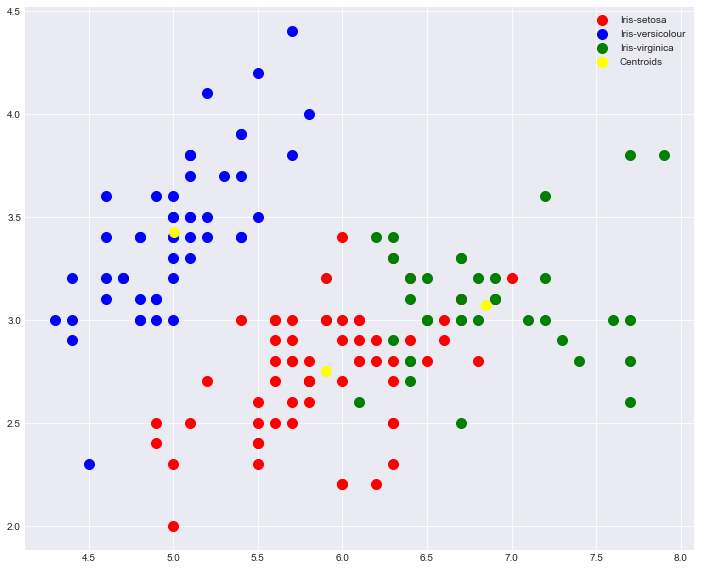

In [27]:
plt.figure(figsize = (12,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

#### So, we conclude that given dataset has 3 cluster points.